# Census Analysis

Submitted by Sarah Ojo

The data is the census data of an average sized town situated between large cities. The town is accessible by motorways that linked it to the cities.  
The aim of the report is to use the insights from the census data to assist the local government to decide on the infrastructure and investment based on the needs of the community.  


In [1]:
# I will import all necessary libraries
import pandas as pd               
import seaborn as sns              
import matplotlib  as plt         
import numpy as np
%matplotlib inline

In [2]:
sd = pd.read_csv('census18.csv') #read in my data from the same folder and assign it to variable sd for sarah's data


In [3]:
sd.head()    # to have an overview of the data structure

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Bulldog Crescent,Harry,Baldwin,36.0,Head,Married,Male,Education administrator,None,None
1,1,Bulldog Crescent,Heather,Baldwin,30.0,Wife,Married,Female,Purchasing manager,None,None
2,1,Bulldog Crescent,Katy,Baldwin,0.0,Daughter,NaN,Female,Child,None,NaN
3,1,Bulldog Crescent,Philip,Giles,40.0,Lodger,Divorced,Male,Manufacturing engineer,None,None
4,1,Bulldog Crescent,Shannon,Allen,31.0,Lodger,Single,Female,Restaurant manager,None,Catholic


In [4]:
print(sd.info()) # An overview of the data

#Issues highlighted

# 1 Age column is float
# 2 Null entries in Religion and Marital Status

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   House Number                   9426 non-null   int64  
 1   Street                         9426 non-null   object 
 2   First Name                     9426 non-null   object 
 3   Surname                        9426 non-null   object 
 4   Age                            9426 non-null   float64
 5   Relationship to Head of House  9426 non-null   object 
 6   Marital Status                 6996 non-null   object 
 7   Gender                         9426 non-null   object 
 8   Occupation                     9426 non-null   object 
 9   Infirmity                      9426 non-null   object 
 10  Religion                       6937 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 810.2+ KB
None


I will check each relevant columns to have a view of the unique entries to better understand the data

In [5]:
sd['Marital Status'].unique() #I can see nan enties and empty string

array(['Married', nan, 'Divorced', 'Single', 'Widowed', ' '], dtype=object)

In [6]:
sd['Religion'].unique() # here there is nan, Nope, empty string

array(['None', nan, 'Catholic', 'Methodist', 'Christian', 'Muslim',
       'Private', 'Jewish', 'Sikh', 'Nope', 'Buddist', 'Baptist', 'Sith',
       'Bahai', 'Agnostic', 'Orthodoxy', ' '], dtype=object)

In [7]:
sd['Relationship to Head of House'].unique() # looks good

array(['Head', 'Wife', 'Daughter', 'Lodger', 'Husband', 'Sibling', 'Son',
       'None', 'Grandson', 'Partner', 'Adopted Son', 'Visitor',
       'Granddaughter', 'Adopted Daughter', 'Cousin', 'Nephew', 'Neice',
       'Step-Son', 'Step-Daughter', 'Son-in-law', 'Adopted Granddaughter',
       'Adopted Grandson'], dtype=object)

In [8]:
sd['Gender'].unique() # looks good

array(['Male', 'Female'], dtype=object)

In [9]:
sd['Occupation'].unique() # I can see a lot of entries

sd['Occupation'].nunique() # to know how many entries are there

1080

In [10]:
sd['Infirmity'].unique() # there is an empty entry

array(['None', 'Disabled', 'Mental Disability', 'Unknown Infection',
       'Physical Disability', ' ', 'Blind', 'Deaf'], dtype=object)

In [11]:
sd.isnull().sum() #to check the sum of all null entries

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   2430
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2489
dtype: int64

#### Cleaning Age Column

First, seeing that the age column is float from above.  I will change the age data type to integer then I will create anaother column to put the ages in bands of 5 years from 0 years to above 100

In [12]:
sd['Age'].unique() # to check all the unique values in age column. 

array([ 36.        ,  30.        ,   0.        ,  40.        ,
        31.        ,  39.        ,  38.        ,  34.        ,
        11.        ,  41.        ,  43.        ,  13.        ,
        48.        ,  52.        ,  16.        ,  55.        ,
        57.        ,  22.        ,  81.        ,  84.        ,
        68.        ,  72.        ,  32.        ,  10.        ,
        61.        ,  65.        ,  21.        ,  23.        ,
        50.        ,  49.        ,  77.        ,  45.        ,
         8.        ,  19.        ,  42.        ,  60.        ,
        75.        ,  15.        ,  54.        ,  53.        ,
        18.        ,  70.        ,  25.        ,  20.        ,
        73.        ,  46.        ,  47.        ,  66.        ,
        63.        ,  35.        ,   9.        ,  51.        ,
         6.        ,  29.        ,  88.        ,  91.        ,
         3.        ,  64.        ,  58.        ,  14.        ,
        12.        ,  44.        ,  78.        ,  56.  

In [13]:
sd['Age'] = sd['Age'].astype(int) # converts to type integer

In [14]:
sd['Age'].info() #to confirm

<class 'pandas.core.series.Series'>
RangeIndex: 9426 entries, 0 to 9425
Series name: Age
Non-Null Count  Dtype
--------------  -----
9426 non-null   int32
dtypes: int32(1)
memory usage: 36.9 KB


Now, I will create the new column by defininf a function that will create the groups then iterate over the column Age to add the groups using list comprehension

In [15]:
def Age_group (age):  # define the function
    if age <= 4:
        return "00 - 04"
    elif age <= 9:
        return "05 - 09"
    elif age <= 14:
        return "10 - 14"
    elif age <= 19:
        return "15 - 19"
    elif age <= 24:
        return "20 - 24"
    elif age <= 29:
        return "25 - 29"
    elif age <= 34:
        return "30 - 34"
    elif age <= 39:
        return "35 - 39"
    elif age <= 44:
        return "40 - 44"
    elif age <= 49:
        return "45 - 49"
    elif age <= 54:
        return "50 - 54"
    elif age <= 59:
        return "55 - 59"
    elif age <= 64:
        return "60 - 64"
    elif age <= 69:
        return "65 - 69"
    elif age <= 74:
        return "70 - 74"
    elif age <= 79:
        return "75 - 79"
    elif age <= 84:
        return "80 - 84"
    elif age <= 89:
        return "85 - 89"
    elif age <= 94:
        return "90 - 94"
    elif age <= 99:
        return "95 - 99"
    else:
        return "100+"
new_group = [Age_group(i) for i in sd['Age']] #list comprehension to iterate over the age column

sd['Age_Grp'] = new_group # add the new column to the data  frams

Plot of Age Pyramid

In [16]:
male_grp = sd['Age_Grp'][sd.Gender == 'Male' ].value_counts().sort_index() # A count of all males  by age group
female_grp = sd['Age_Grp'][sd.Gender == 'Female' ].value_counts().sort_index() # A count of all females  by age group


age_p = pd.DataFrame({'Male': -1* male_grp,   # Concatenate both grps to make a dataframe, males are multiplied by -1
'Female': female_grp})                        # This is to make it go the opposite direction on the pyramid plot

age_p.index.names = ['Age_grp']  # To set the name of the index 
age_p.reset_index(inplace=True)

AgeClass = [ "00 - 04","05 - 09","10 - 14", "15 - 19", "20 - 24", "25 - 29", "30 - 34", "35 - 39", "40 - 44", "45 - 49", "50 - 54", "55 - 59",
    "60 - 64", "65 - 69", "70 - 74", "75 - 79", "80 - 84", "85 - 89", "90 - 94", "95 - 99", "100+" ]

# AgeClass will be used in arranging the pyramid later
age_p


,Age_grp,Male,Female
0,00 - 04,-297,268
1,05 - 09,-333,354
2,10 - 14,-368,347
3,100+,-5,4
4,15 - 19,-369,397
5,20 - 24,-373,370
6,25 - 29,-284,345
7,30 - 34,-301,342
8,35 - 39,-353,423
9,40 - 44,-332,413


[Text(0.5, 1.0, 'Age Pyramid')]

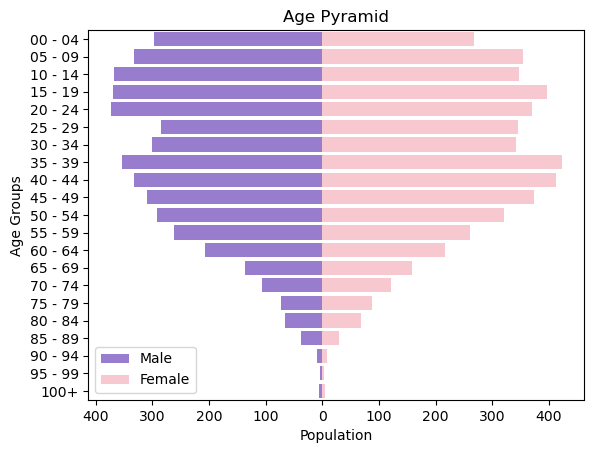

In [17]:
# To plot the age pyramid, I will plot the male, then female

age_pyramid = sns.barplot(y='Age_grp', x='Male', data=age_p, order=AgeClass, color=('mediumpurple'), label='Male')

age_pyramid = sns.barplot(y='Age_grp', x='Female', data=age_p, order=AgeClass, color=('pink'), label='Female')

xticks = [-400, -300, -200, -100, 0, 100, 200, 300, 400]  

age_pyramid.set_xticks(xticks)
age_pyramid.set_xticklabels([abs(x) for x in xticks]) #to enusre the labels only show positive numbers
age_pyramid.legend()

age_pyramid.set_xlabel('Population')
age_pyramid.set_ylabel('Age Groups')
age_pyramid.set(title = 'Age Pyramid')



#### Cleaning Religion Column

Issues seen above with the religion column are highlighted below:
1. Some Null Values
2. Empty Entries   
3. Some Unclear entries such as Nope, Sith

In [18]:
# Lets start dealing with the null values by checking all the entries with null.
sd[sd['Religion'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age_Grp
2,1,Bulldog Crescent,Katy,Baldwin,0,Daughter,NaN,Female,Child,None,NaN,00 - 04
9,3,Bulldog Crescent,Pauline,Roberts,11,Daughter,NaN,Female,Student,None,NaN,10 - 14
12,4,Bulldog Crescent,Maureen,Yates,13,Daughter,NaN,Female,Student,None,NaN,10 - 14
15,5,Bulldog Crescent,Cheryl,Smith,16,Daughter,NaN,Female,Student,None,NaN,15 - 19
25,10,Bulldog Crescent,Denis,Khan,10,Son,NaN,Male,Student,None,NaN,10 - 14
...,...,...,...,...,...,...,...,...,...,...,...,...
9400,1,Stevens Lodge,Hollie,Tucker,9,Granddaughter,NaN,Female,Student,None,NaN,05 - 09
9401,1,Stevens Lodge,Norman,Spencer,6,Grandson,NaN,Male,Student,None,NaN,05 - 09
9406,1,Dolphin Lodge,Pamela,Griffiths,15,Daughter,NaN,Female,Student,None,NaN,15 - 19
9407,1,Dolphin Lodge,Clifford,Griffiths,15,Adopted Son,NaN,Male,Student,None,NaN,15 - 19


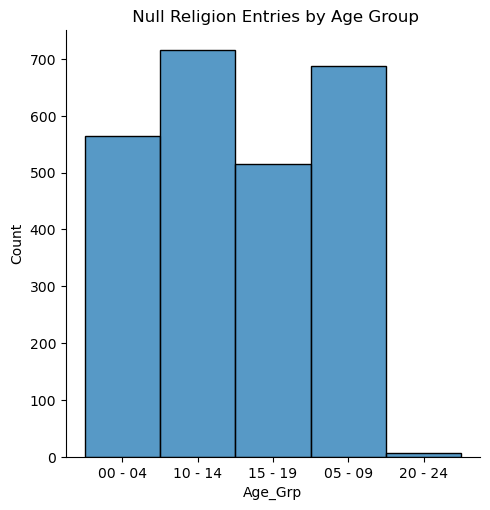

In [19]:
sns.displot( sd[sd['Religion'].isna()], x = 'Age_Grp').set(title = ' Null Religion Entries by Age Group') 
# Plot all null entries by age group to see any similarity

In [20]:
#We can see that only few entries in the null religion are above 15 to 19 age band, 
# so I will check the religion for all entries below 18 years

sd[sd['Age'] < 18]['Religion'].value_counts()

Series([], Name: Religion, dtype: int64)

In [21]:
# Since all entries below 18 have null vaues, I can change them to Minor
sd.loc[(sd['Religion'].isna() ) & (sd['Age'] < 18), 'Religion'] = 'Minor'

In [22]:
# I want to see how many of them are still null asides the minors
len(sd[sd['Religion'].isna()])

58

In [23]:
#For those ones, I will change them to 
sd.loc[sd['Religion'].isna(), 'Religion'] = 'Unknown'

In [24]:
#I want to see how many entries are empty
len(sd[sd['Religion'] == ' '])

1

In [25]:
#I want to see the entries that are empty
sd[sd['Religion'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age_Grp
8840,4,ExcaliburBells Street,Jean,O'Brien,43,Wife,Married,Female,Ecologist,None,,40 - 44


In [26]:
#I want to look at other people in her household
sd[8835:8845]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age_Grp
8835,2,ExcaliburBells Street,Marie,Taylor,6,Daughter,NaN,Female,Student,None,Minor,05 - 09
8836,2,ExcaliburBells Street,Hugh,Taylor,3,Adopted Son,NaN,Male,Child,None,Minor,00 - 04
8837,2,ExcaliburBells Street,Jamie,Taylor,0,Son,NaN,Male,Child,None,Minor,00 - 04
8838,3,ExcaliburBells Street,Jeffrey,Hamilton,21,Head,Single,Male,University Student,None,None,20 - 24
8839,4,ExcaliburBells Street,Clifford,O'Brien,46,Head,Married,Male,Child psychotherapist,None,Christian,45 - 49
8840,4,ExcaliburBells Street,Jean,O'Brien,43,Wife,Married,Female,Ecologist,None,,40 - 44
8841,4,ExcaliburBells Street,Tracy,O'Brien,15,Daughter,NaN,Female,Student,None,Minor,15 - 19
8842,5,ExcaliburBells Street,Emily,Curtis,28,Head,Married,Female,Environmental health practitioner,None,None,25 - 29
8843,5,ExcaliburBells Street,Danny,Curtis,31,Husband,Married,Male,"Geologist, engineering",None,None,30 - 34
8844,5,ExcaliburBells Street,Patrick,Curtis,5,Son,NaN,Male,Student,None,Minor,05 - 09


In [27]:

##it is very difficult to infer from the above, so I will change it to unknown
sd.loc[sd['Religion'] == ' ', 'Religion'] = 'Unknown'

In [28]:
sd['Religion'].unique()

array(['None', 'Minor', 'Catholic', 'Methodist', 'Christian', 'Muslim',
       'Unknown', 'Private', 'Jewish', 'Sikh', 'Nope', 'Buddist',
       'Baptist', 'Sith', 'Bahai', 'Agnostic', 'Orthodoxy'], dtype=object)

In [29]:
#Some entries are 'Nope', I will check out these entries
sd[sd['Religion'] == 'Nope']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age_Grp
964,114,Love Avenue,Claire,Davies,36,Head,Divorced,Female,Veterinary surgeon,None,Nope,35 - 39
8358,12,Bailey Plains,Mohammad,Skinner,31,Head,Single,Male,"Therapist, horticultural",None,Nope,30 - 34
8359,12,Bailey Plains,Donna,King,25,Partner,Single,Female,"Scientist, biomedical",None,Nope,25 - 29


In [30]:
# changing it to none as nope is an informal way of saying none
sd.loc[sd['Religion'] == 'Nope', 'Religion'] = 'None'

In [31]:
# An entry is sith, I will check it out
sd[sd['Religion'] == 'Sith']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age_Grp
2362,21,Gallows Crescent,Joanna,Banks,53,Head,Divorced,Female,"Doctor, hospital",None,Sith,50 - 54


In [32]:
# can I infer anything from the other members of his household?
sd[2355:2368]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age_Grp
2355,18,Gallows Crescent,Natalie,Summers,51,Head,Married,Female,Analytical chemist,None,None,50 - 54
2356,18,Gallows Crescent,Albert,Summers,55,Husband,Married,Male,Environmental education officer,None,None,55 - 59
2357,18,Gallows Crescent,William,Summers,21,Son,Single,Male,University Student,None,None,20 - 24
2358,18,Gallows Crescent,Francis,Summers,12,Son,NaN,Male,Student,None,Minor,10 - 14
2359,19,Gallows Crescent,Ellie,Conway,75,Head,Single,Female,Retired Holiday representative,None,None,75 - 79
2360,20,Gallows Crescent,Gareth,Kaur,55,Head,Married,Male,"Chemist, analytical",None,Christian,55 - 59
2361,20,Gallows Crescent,Lynda,Kaur,51,Wife,Married,Female,Analytical chemist,None,Christian,50 - 54
2362,21,Gallows Crescent,Joanna,Banks,53,Head,Divorced,Female,"Doctor, hospital",None,Sith,50 - 54
2363,21,Gallows Crescent,Nathan,Banks,32,Son,Single,Male,IT technical support officer,None,None,30 - 34
2364,21,Gallows Crescent,Mandy,Banks,23,Daughter,Divorced,Female,"Teacher, adult education",None,None,20 - 24


In [33]:
# I will change 'Sith' to none since it is not a recognised religion in the UK and moreover, other members of the house are also none
sd.loc[sd['Religion'] == 'Sith', 'Religion'] = 'None'

In [34]:
# now lets check the religion column, it seems clean
sd['Religion'].unique()

array(['None', 'Minor', 'Catholic', 'Methodist', 'Christian', 'Muslim',
       'Unknown', 'Private', 'Jewish', 'Sikh', 'Buddist', 'Baptist',
       'Bahai', 'Agnostic', 'Orthodoxy'], dtype=object)

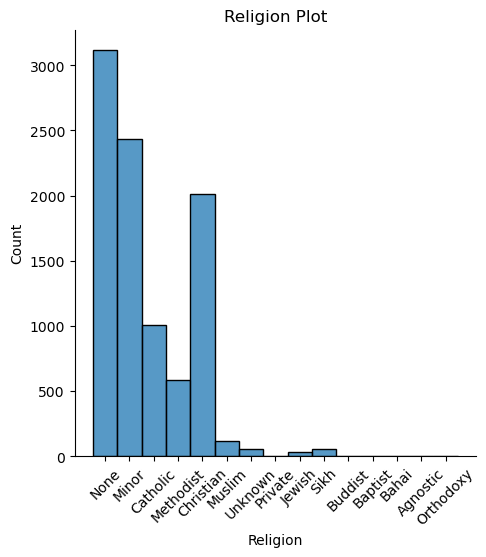

In [35]:
Rel_plt = sns.displot( sd, x = 'Religion').set(title = 'Religion Plot')
Rel_plt.set_xticklabels(rotation=45)

#### Cleaning Marital Status

In [36]:
#checking out the nulll entries
sd[sd['Marital Status'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age_Grp
2,1,Bulldog Crescent,Katy,Baldwin,0,Daughter,NaN,Female,Child,None,Minor,00 - 04
9,3,Bulldog Crescent,Pauline,Roberts,11,Daughter,NaN,Female,Student,None,Minor,10 - 14
12,4,Bulldog Crescent,Maureen,Yates,13,Daughter,NaN,Female,Student,None,Minor,10 - 14
15,5,Bulldog Crescent,Cheryl,Smith,16,Daughter,NaN,Female,Student,None,Minor,15 - 19
25,10,Bulldog Crescent,Denis,Khan,10,Son,NaN,Male,Student,None,Minor,10 - 14
...,...,...,...,...,...,...,...,...,...,...,...,...
9400,1,Stevens Lodge,Hollie,Tucker,9,Granddaughter,NaN,Female,Student,None,Minor,05 - 09
9401,1,Stevens Lodge,Norman,Spencer,6,Grandson,NaN,Male,Student,None,Minor,05 - 09
9406,1,Dolphin Lodge,Pamela,Griffiths,15,Daughter,NaN,Female,Student,None,Minor,15 - 19
9407,1,Dolphin Lodge,Clifford,Griffiths,15,Adopted Son,NaN,Male,Student,None,Minor,15 - 19


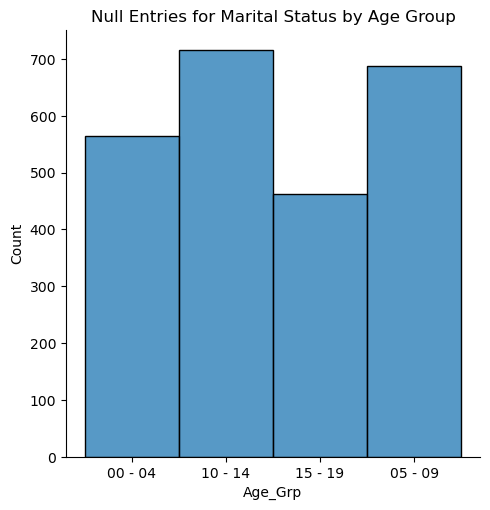

In [37]:
#A plot of null marital status by age group
marital_plt = sns.displot(sd[sd['Marital Status'].isna()], x = 'Age_Grp').set(title = 'Null Entries for Marital Status by Age Group')

In [38]:
sd[sd['Marital Status'].isna()]['Age'].max() 

17

In [39]:
# Since all the entries are below 18 years, they will changed to single(minor) as they are still under the legal age of marriage in the UK
sd.loc[(sd['Marital Status'].isna()) & (sd['Age'] < 18), 'Marital Status'] = 'Single (Minor)'

In [40]:
#checking the empty string entry
sd[sd['Marital Status'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age_Grp
8941,4,Parsons Inlet,Jason,Davies,56,Husband,,Male,Geochemist,None,Catholic,55 - 59


In [41]:
#checking for other members of his household. 
sd[(sd['House Number'] == 4 ) & (sd['Street'] == 'Parsons Inlet')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age_Grp
8940,4,Parsons Inlet,Heather,Davies,51,Head,Married,Female,Equality and diversity officer,None,Catholic,50 - 54
8941,4,Parsons Inlet,Jason,Davies,56,Husband,,Male,Geochemist,None,Catholic,55 - 59
8942,4,Parsons Inlet,Jacqueline,Davies,12,Daughter,Single (Minor),Female,Student,None,Minor,10 - 14
8943,4,Parsons Inlet,Gavin,Davies,11,Son,Single (Minor),Male,Student,None,Minor,10 - 14


In [42]:
#based on the information seen above, I will chage it to 'Married'
sd.loc[sd['Marital Status'] == ' ', 'Marital Status'] = 'Married'

In [43]:
# It is very unusual for an 18 year old to be anything other than single,
# So I will check for this and decide if I will change it based on other information 
sd[(sd['Marital Status'] != 'Single' ) & (sd['Age'] == 18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age_Grp
63,7,Leviathan Avenue,Grace,Price,18,Head,Divorced,Female,Student,None,Unknown,15 - 19
1327,169,Love Avenue,Ross,Smith,18,Son,Divorced,Male,Student,None,Christian,15 - 19
1539,199,Love Avenue,Jay,John,18,Son,Divorced,Male,Student,None,Christian,15 - 19
2446,26,Merlin Extension,Joanna,Stokes,18,Daughter,Divorced,Female,Student,None,Catholic,15 - 19
2921,114,Williams Locks,Terry,Johnson,18,Lodger,Divorced,Male,Student,None,Unknown,15 - 19
3533,178,Corporation Road,Sean,Saunders,18,Head,Married,Male,Student,None,Unknown,15 - 19
3671,18,Morar Lane,Julian,Carter,18,Son,Divorced,Male,Student,None,None,15 - 19
3884,8,Albertpond Crescent,Pauline,Spencer,18,Daughter,Divorced,Female,Student,None,Christian,15 - 19
4551,17,Virgofix Crescent,Frances,Watson,18,Daughter,Divorced,Female,Student,None,Christian,15 - 19
5522,48,Tannery Lane,Sylvia,Lawson,18,Head,Married,Female,Student,None,Unknown,15 - 19


In [44]:
#As seen above, some of them are married or divorced  and all of them are university students. 
# I will take the call to convert them to single

sd.loc[(sd['Marital Status']!= 'Single' ) & (sd['Age'] == 18), 'Marital Status'] = 'Single'

[Text(0.5, 1.0, 'Marital Status by Age')]

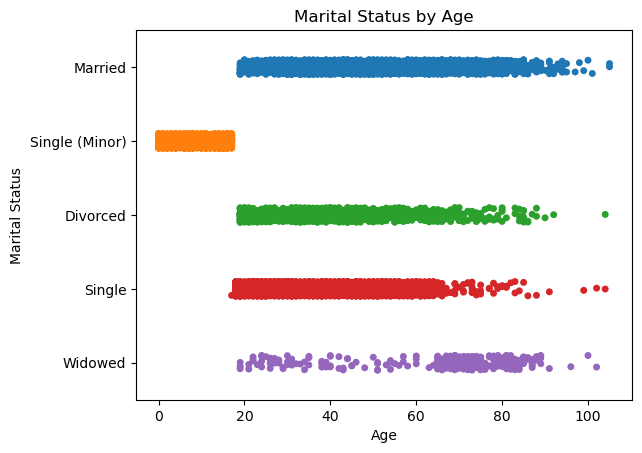

In [45]:
#A plot of the cleaned marital status column

sns.stripplot(data = sd, x = 'Age', y = 'Marital Status' ).set(title = 'Marital Status by Age')

I noticed some outliers in the single box want to check the dataframe to see if there are other people living in the same household as the old singles.  Just to see if we can infer their actual marital status from the info about their household

In [46]:
old_single = sd[(sd['Marital Status'] == 'Single') & (sd['Age'] > 80)]
len(old_single)

13

In [47]:
matches = pd.DataFrame(columns = sd.columns)
for index, i in old_single.iterrows():   #
    match =sd[(sd['House Number'] == i['House Number']) & (sd['Street'] == i['Street'])]
    if len(match)> 0:
        matches = pd.concat([matches, match], ignore_index = True)


In [48]:
matches

#All of them live alone except for who lives with her two sons and it is not uncommon to live have children as a single person

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age_Grp
0,118,Love Avenue,Billy,Daniels,104,Head,Single,Male,"Retired Conservator, museum/gallery",None,None,100+
1,13,Morar Lane,Sharon,Dennis,81,Head,Single,Female,"Retired Optician, dispensing",None,Christian,80 - 84
2,38,Moran Skyway,Molly,Field,99,Head,Single,Female,"Retired Administrator, education",None,Christian,95 - 99
3,14,Inner Turnpike,Kyle,Rowley,82,Head,Single,Male,Retired Multimedia programmer,None,Christian,80 - 84
4,114,Portsmouthcoffer Street,Alison,Cooke,91,Head,Single,Female,Retired IT sales professional,None,Christian,90 - 94
5,9,Schoolcross Road,June,Banks,84,Head,Single,Female,Retired Diplomatic Services operational officer,None,Christian,80 - 84
6,8,Porter Parks,Gavin,Wallace,102,Head,Single,Male,Retired Health promotion specialist,None,Catholic,100+
7,4,Outer Drive,Megan,Barker,83,Head,Single,Female,"Retired Scientist, research (physical sciences)",None,Methodist,80 - 84
8,8,Outer Drive,Bradley,Bradley,85,Head,Single,Male,Retired Theatre director,None,None,85 - 89
9,25,Jones Spring,June,Howe,86,Head,Single,Female,Retired Arts administrator,None,Christian,85 - 89


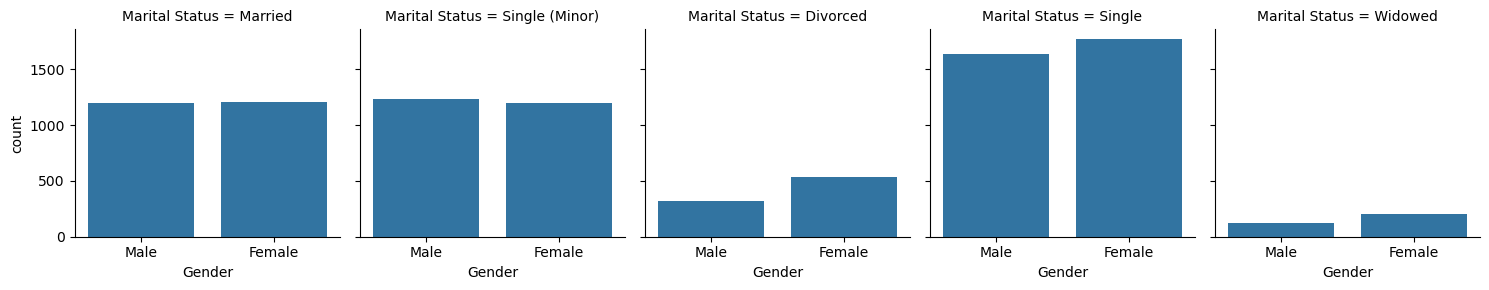

In [49]:
#A plot of Marital Status by Gender
sns.FacetGrid(sd, col = 'Marital Status').set(title = 'Marital Status by Gender').map(sns.countplot, 'Gender', order = ['Male', 'Female'])

#### Cleaning Occupation Column

In [50]:
#Earlier I saw 1,080 entries in the occupation column 
sd['Occupation'].unique()

array(['Education administrator', 'Purchasing manager', 'Child', ...,
       'Retired Statistician', 'Retired Restaurant manager, fast food',
       'Retired Careers information officer'], dtype=object)

In [51]:
#Checking for empty strings since there are no null values
sd[sd['Occupation'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age_Grp
8078,7,Green Glens,Jill,Stevens,9,Daughter,Single (Minor),Female,,None,Minor,05 - 09


In [52]:
# the empty string entry is a minor, s oI will check for minors occupation just tobe sure of how to deal with it
sd[sd['Age'] < 18]['Occupation'].unique()

array(['Child', 'Student', ' '], dtype=object)

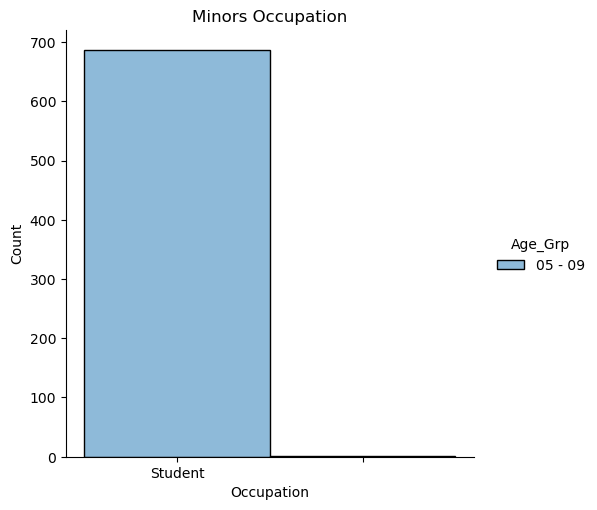

In [53]:
# Checking the plot of age band 5 to 9 years to see the occupation
sns.displot(sd[sd['Age_Grp'] == '05 - 09'], x = 'Occupation', hue = 'Age_Grp' ).set(title = 'Minors Occupation')

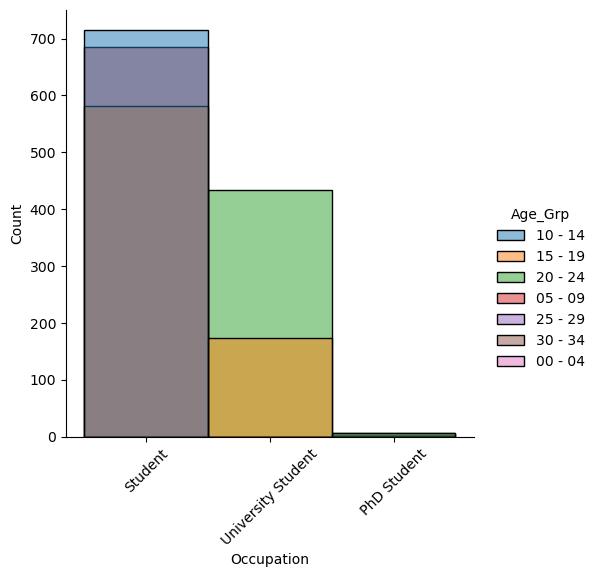

In [54]:
#I will like to see all student entries

sns.displot(sd[sd['Occupation'].str.contains('Student', case = False)], x = 'Occupation', hue = 'Age_Grp' ).set_xticklabels(rotation=45) 

# There are students accross different age groups, I will like to differentiate them

In [55]:
sd.loc[sd['Occupation'] == ' ', 'Occupation'] = 'Student' # for the empty entry above
sd.loc[(sd['Occupation'] == 'Student') 
       & (sd['Age'] < 18), 'Occupation'] = 'Student(Minor)' # to differentiate minor students from matured students

In [56]:
#I want to create another column to describe the occupation categories. 
# I will use a defined function and list comprehension to go over the columns and assign occupation categories
def Occupation_Group (occupation):
    if 'Retired' in occupation:
        return "Retired"                            # for retired people
    elif occupation == 'Student(Minor)':            # for minor students
        return "Student(Minor)"
    elif 'Student' in occupation :
        return "Student"                 # other matured sstudents with phd students too
    elif occupation == 'Unemployed':
        return "Unemployed"    
    elif occupation == 'Child':                  
        return "Child"                             #Children below 5 years
    else:
        return "Employed"                          # All other entries
Employment  = [Occupation_Group(i) for i in sd['Occupation']]
sd['Employment Category'] = Employment

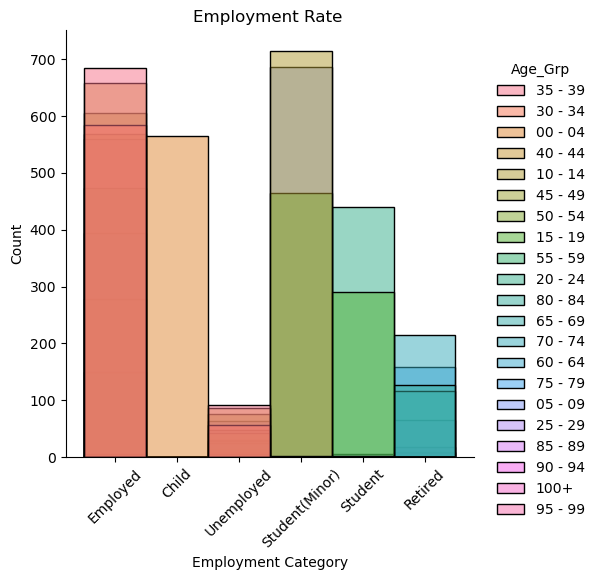

In [57]:
sns.displot(sd, x = 'Employment Category', hue = 'Age_Grp').set(title = 'Employment Rate ').set_xticklabels(rotation=45)


In [58]:
sd['Employment Category'].value_counts()

Employed          4962
Student(Minor)    1867
Student            739
Retired            716
Unemployed         578
Child              564
Name: Employment Category, dtype: int64

#### Cleaning Infirmity Column

The column contains some empty strings, I will check them if possible convert them to something meaningful, if not, I will conert them to unknown


In [59]:
sd[sd['Infirmity'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age_Grp,Employment Category
1048,126,Love Avenue,Jake,Hughes,56,Lodger,Single,Male,Unemployed,,Christian,55 - 59,Unemployed
1061,128,Love Avenue,Melanie,Poole,32,Lodger,Single,Female,Horticultural therapist,,Methodist,30 - 34,Employed
1537,199,Love Avenue,Toby,John,24,Son,Single,Male,"Administrator, arts",,None,20 - 24,Employed
2395,7,Merlin Extension,Cheryl,Smith,40,Head,Divorced,Female,Industrial/product designer,,None,40 - 44,Employed
3683,22,Morar Lane,Gail,Long,30,Head,Single,Female,Armed forces training and education officer,,Muslim,30 - 34,Employed
4954,134,Virgofix Crescent,Derek,Poole,0,Son,Single (Minor),Male,Child,,Minor,00 - 04,Child
8220,29,Green Glens,Jeremy,Green-Morgan,20,Son,Single,Male,University Student,,Christian,20 - 24,Student


In [60]:
#No information can be gotten from other columns, hence I will convert them all to unknown

sd.loc[sd['Infirmity'] == ' ', 'Infirmity'] = 'Unknown'

### Analysis

#### Birth Rate and Death Rate

I will calculate to seee a trend in the birth rate. but it wil be difficult to compute the death rate, so I will only use the difference in age bands above 65 years,  as a shrinkage in the population is more likely to be caused by death due to aging

In [61]:
# Current birth rate
# I will calculate by dividing number of birth in the year i.e children aged 0 by the number of population * 1000
newborn = sd[sd['Age']== 0]
birth_rate = (len(newborn)/len(sd)) * 1000
birth_rate

11.245491194568215

In [62]:
# previous birth rate - 5 years ago
# I will calculate by dividing number of birth 5 years ag0 i.e children aged 5 by the number of estimated population * 1000
age_5 = sd[sd['Age']== 5]
prev_birth_rate = (len(age_5)/len(sd[sd['Age']  >= 5])) * 1000 # exclude children that were not yet given birth to then
prev_birth_rate

14.671030357747432

In [63]:
# previous birth rate - 10 years ago
# I will calculate by dividing number of birth 10 years ago i.e children aged 10 by the number of estimated population * 1000
age_10 = sd[sd['Age']== 10]
prev_birth_rate = (len(age_10)/len(sd[sd['Age']  >= 10])) * 1000  # exclude children that were not yet given birth to then
prev_birth_rate

16.51578174700269

In [64]:
# I will compute the diff in age using the groupby syntax from the pandas documentation
#
sd.loc[sd['Age_Grp'] == '100+', 'Age_Grp'] = 'Above 99' # changed to aid arrangement of the Age_Grp
age = sd[['Age_Grp','Age']]
agegrp_count = age.groupby(['Age_Grp']).count() #To do a count of age groups

diff_age = agegrp_count.diff() #the diff in the age grps
diff_age

death_rate =((diff_age[13:21].sum()/5)/len(sd))*1000 # / by 5 to get the annual rate
death_rate

Age   -8.805432
dtype: float64

#### Occupancy Rate




In [65]:
# Create a concatenated address column to do a count of people living in the same household
sd['Address']  =  sd['House Number'].astype(str) + " " + sd['Street']

In [66]:
sd['house_occupancy'] = sd.groupby('Address')['Address'].transform('count') #to do a count of people living in the same household

In [67]:
# I will add a column to help categorize the occupancy rate which I will use for further analysis
def Occupancy_No (occupancy):
    if occupancy == 1 :
        return "1 Person"
    elif occupancy == 2:
        return "2 People"
    elif occupancy == 3:
        return "3 People"
    elif occupancy == 4:
        return "4 People"
    else:
        return "5 or More People"
Occu  = [Occupancy_No(i) for i in sd['house_occupancy']]
sd['Occupancy Group'] = Occu


In [68]:
# to enable me use the count made above for  further calculations
new_occu = sd.drop_duplicates(subset = ['Address'])
print ('Number of households in the town are ', len(new_occu)) # total numner of households

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

Number of households in the town are  3047


In [69]:
# average number of people living in a household
occupancy_rate = new_occu['house_occupancy'].mean()
print('Average Occupancy Rate is ', occupancy_rate)

Average Occupancy Rate is  3.0935346242205446


In [70]:
# Households with 5 or more people will be classified as overoccupied
overoccupied_household =len( new_occu[new_occu['Occupancy Group'] == '5 or More People'])
overoccupied_household

587

In [71]:
# People living in over occupied households
overoccupied = sd[sd['Occupancy Group'] == '5 or More People']

In [72]:
percent_overoccupied  = (len(overoccupied)/len(sd)) *100
percent_overoccupied

40.982389136431145

[Text(0.5, 1.0, 'Household Occupancy Rate')]

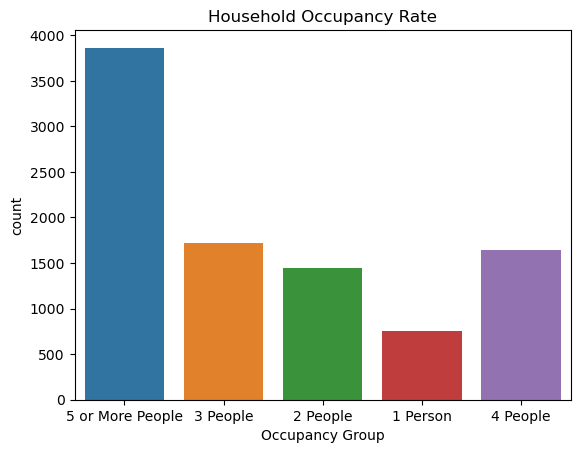

In [73]:
sns.countplot( x = 'Occupancy Group', data = sd ).set(title = 'Household Occupancy Rate')

In [74]:
#To calculate the number of houses needed in the town. I will exclude minors as they cannot live on their own 
sufficient_houses  = (len(overoccupied[overoccupied['Marital Status'] != 'Single (Minor)']))/occupancy_rate
 

no_of_houses_needed = sufficient_houses - overoccupied_household

no_of_houses_needed

255.0788245279016

#### Divorce and Marriage Rates

In [75]:
# Calculate number of people that are married and divorced
# I will assign the data containing married and divorced people to two new variables
married = sd[sd['Marital Status'] == 'Married']
divorced = sd[sd['Marital Status'] == 'Divorced']

In [76]:
# We can see that the number of female divorcees are higher than male suggesting that some males leave after divorce.
# I will base the divorce rate calculation on the number of females since they are less likely to leave the town

divorce_rate=(len(divorced[divorced['Gender'] == 'Female'])/len (sd)) * 1000


print('Divorce Rate is = ', divorce_rate)

 
marriage_rate = (len(married)/2)/len(sd) * 1000


print('Marriage Rate is = ',marriage_rate)


divorce_to_marriage =( len(divorced[divorced['Gender'] == 'Female'] ) / (len(married)/2) )

print('Divorce to Marriage Ratio = ', divorce_to_marriage)

Divorce Rate is =  57.07617228941227
Marriage Rate is =  127.5726713346064
Divorce to Marriage Ratio =  0.4474012474012474


#### Emmigration Rate

#### Migration by Divorce

In [77]:
# I will use the number of male divorcees who might have left the town to compute the no of pottential emmigrant
marital_emmigration = -(len(divorced[divorced['Gender'] == 'Female']) - len(divorced[divorced['Gender'] == 'Male'])) /len(sd) * 1000
print('potential marital emmigration rate in the town is', marital_emmigration)

potential marital emmigration rate in the town is -22.809251007850627


#### Lodgers and Visitors Immigration

In [78]:
# computing people who are living in a house temporarily
temp = sd[(sd['Relationship to Head of House']== 'Lodger') | (sd['Relationship to Head of House']== 'Visitor')] 
 

In [79]:
temp['Marital Status'].value_counts() # Who are they? Its okay if they are single, 
# but divorced will suggest they only moved from their divorced spouse to live elsewhere

Single      363
Divorced    106
Widowed       6
Name: Marital Status, dtype: int64

In [80]:
temp['Employment Category'].value_counts() # 10% of them are students, they are likely to stay till they graduate

Employed      401
Student        41
Unemployed     33
Name: Employment Category, dtype: int64

In [81]:
# I will assume another 10% will move in to the town more permanently making 20%
temp_immigration = (len(temp[temp['Marital Status'] != 'Divorced']) * 0.2)/len(sd) * 1000
print('potential immigration rate by temporary residents in the town is', temp_immigration)

potential immigration rate by temporary residents in the town is 7.829408020369192


In [82]:
#Earlier from the age pyramid, I noticed a bulge in the 35 to 39 age band.  I want to have a better view of people in the age band
# So I will first check their relationship to the head of house
potential_midage_migrant = sd[sd['Age_Grp'] == '35 - 39']
potential_midage_migrant['Relationship to Head of House'].value_counts()

Head                342
Husband             102
Son                  76
None                 69
Daughter             58
Lodger               51
Partner              34
Wife                 30
Sibling               7
Cousin                5
Visitor               1
Adopted Daughter      1
Name: Relationship to Head of House, dtype: int64

In [83]:
# Earlier from the age pyramid, I noticed a bulge in the 35 to 39 age band. So i will check this diff and see if it 
# corresponds to any of the numbers in the potential midage migrant to have a better understanding of why they moved in to the town
diff_age[7:8].sum() #diff_age used group by and count to get diff in age band

Age    133.0
dtype: float64

In [84]:
# the difference of 133 above is close to the sum of husbands and wives of the heads of house(132),
# so I will assume they moved in to the town when they got married
marital_immigrant =((diff_age[7:8].sum())/len(sd))*1000 #diff_age used group by and count to get diff in age band
print('potential marital immigration ', marital_immigrant)

potential marital immigration  Age    14.109909
dtype: float64


In [85]:
# students moving out of the town calculated using the diff in age band 25 - 29(graduation age range) and 20 - 24(university age range)
student_emmigrant =((diff_age[5:6].sum())/len(sd))*1000 #diff_age used group by and count to get diff in age band
print('potential student emmigrant rate is ', student_emmigrant)

potential student emmigrant rate is  Age   -12.094208
dtype: float64


In [86]:
#potential migration rate is calculated by subtracting the emmigration rate from the immigration rate

potential_immigration = temp_immigration + marital_immigrant

potential_emmigration = marital_emmigration + student_emmigrant

potential_migration_rate = potential_immigration + potential_emmigration #emmigration is already in negative

print('potential migration rate is ', potential_migration_rate)

potential migration rate is  Age   -12.964142
dtype: float64


In [87]:
# Potential population increase/decrease rate

pop_change = birth_rate + death_rate + potential_migration_rate
pop_change

Age   -10.524082
dtype: float64

#### Employment Rate

In [88]:
#Number of unemployed people in the town
unemployed = sd[sd['Employment Category'] == 'Unemployed']
len(unemployed)

578

In [89]:
# Unemployment rate comparing with the whole population
unemployment_rate = len(unemployed)/len(sd) * 100

print('Unemployment rate on total population is', unemployment_rate)

Unemployment rate on total population is 6.131975387226819


In [90]:
#Unemployment rate comparing with only employable population excluding the minors

employable = sd[sd['Age'] >= 18]
unemployment_rate = len(unemployed)/len(employable) * 100
print('Unemployment rate on employable population is', unemployment_rate)

Unemployment rate on employable population is 8.263045032165833


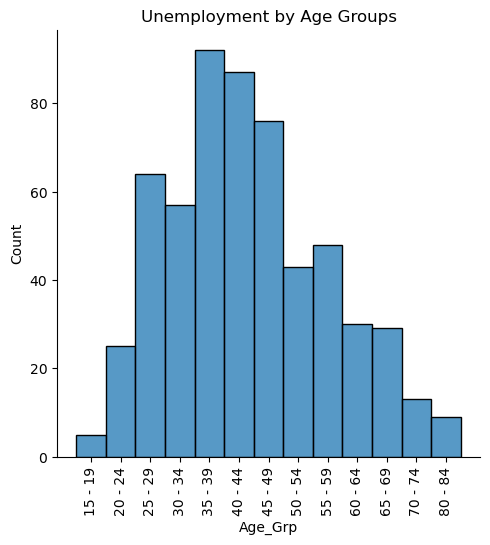

In [91]:
#Plot of the unemployment by age groups to see if the unemployment is more concentrated on some age groups
unemployed = unemployed.sort_values(by='Age_Grp')
sns.displot( x = 'Age_Grp', data = unemployed).set(title = 'Unemployment by Age Groups').set_xticklabels( rotation=90)

In [92]:
# As seen above the unemployment is more concentrated in the middle age. 
# I will like to know the number of people who still have some work years left
# this will determine those who might need to be trained

#First I will use the minimum age of those who are retired as a benchmark.
# Any one below the minimum retirement age should be trained to enable them work
retired = sd[sd['Employment Category'] == 'Retired']
min_work_age = retired['Age'].min()

trainable_people = unemployed[unemployed['Age'] < min_work_age ]
print(len(trainable_people))

545


In [93]:
# what percentage of the unemployed population is that

trainable_percent = len(trainable_people)/len(unemployed) * 100
trainable_percent

94.29065743944636

In [94]:
#Assuming 100%, 80% or 60% the trained people become employed after the training, how will it reduce unemployment

assumption = [1, 0.8,0.6]
for i in assumption:
    new_unemploy = (len(unemployed) - (len(trainable_people)* i ))/len(employable) *100
    print(new_unemploy)


0.47176554681915656
2.030021443888492
3.5882773409578266


#### Commuters

In [95]:
# One thing is sure, all unversity students in the town are commuters since there is no university in the town
# Also anyone likely to work in a university is a commuter

university_students = sd[(sd['Occupation'].str.contains('University', case = False)) | (sd['Occupation'].str.contains('PhD', case = False))]
professors = sd[(sd['Occupation'].str.contains('Professor', case = False))]
lecturers = sd[(sd['Occupation'].str.contains('lecturer higher education', case = False))]
researchers = sd[(sd['Occupation'].str.contains('Research', case = False)) ]

                  
potential_commuters = len(university_students) + len(professors) + len(lecturers) + len(researchers)

percent_commute = potential_commuters/len(sd) * 100
print(potential_commuters, 'people regularly commute and they make up', round(percent_commute, 0), '% of the population')


823 people regularly commute and they make up 9.0 % of the population


#### Number of Houses per street

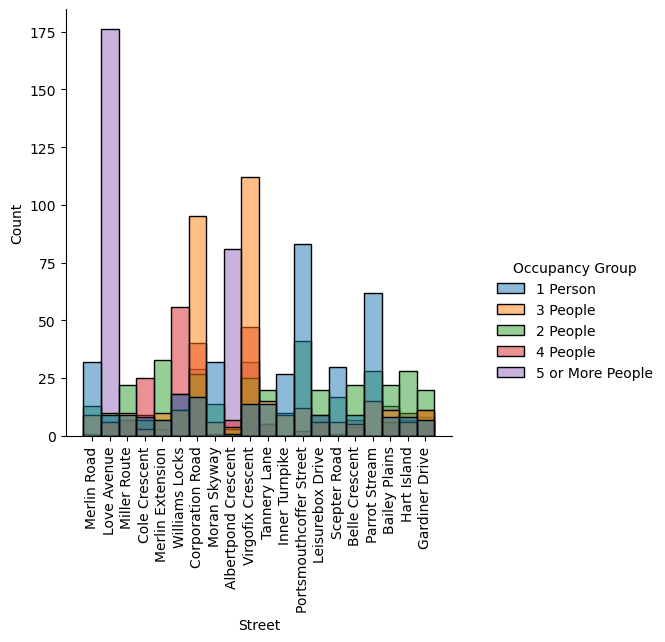

In [97]:
street_counts = new_occu['Street'].value_counts()
top_20_streets = street_counts.nlargest(20).index #create a list with the top 30 streets
only_top_20 = new_occu[new_occu['Street'].isin(top_20_streets)] 
sns.displot(only_top_20, x = 'Street', hue = 'Occupancy Group').set_xticklabels(rotation=90) 


To calculate average number of houses per streets, I will create an new dataset that counts the number of houses and groups by street, then I will calculate 

In [98]:

new_occu['House_Count'] = new_occu.groupby('Street')['Street'].transform('count') #to do a count of people living in the same household

C:\Users\sarah\AppData\Local\Temp\ipykernel_20276\786403116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_occu['House_Count'] = new_occu.groupby('Street')['Street'].transform('count') #to do a count of people living in the same household


In [99]:
#I will drop the duplicates in the street data to enable me use the data for calculation 
street_house_count = new_occu.drop_duplicates(subset = ['Street'])

#The number of streets in the town
no_of_streets = len(street_house_count)

#Average number of houses in the town
av_households = street_house_count['House_Count'].mean()
print('There are', no_of_streets , 'streets in the town, with an average of', round(av_households,0), 'households per streets')

#Number of streets having above the average households number
dense_pop_streets = street_house_count[street_house_count['House_Count'] >= 29]
print(len(dense_pop_streets), 'streets have more than', round(av_households,0), 'households')

#percentage densely populated streets

percent_dense = len(dense_pop_streets)/no_of_streets *100
print(round(percent_dense, 0),'% streets are above the average households number')

There are 105 streets in the town, with an average of 29.0 households per streets
34 streets have more than 29.0 households
32.0 % streets are above the average households number


#### Infirmity

In [100]:
sd['Infirmity'].value_counts()

None                   9355
Physical Disability      22
Blind                    11
Mental Disability         9
Unknown Infection         9
Disabled                  7
Unknown                   7
Deaf                      6
Name: Infirmity, dtype: int64

In [101]:
#calculate infirmity rate

infirm = sd[sd['Infirmity'] != 'None']
infirmity_rate = len(infirm)/len(sd) *100
print('Infirmity Rate is = ', infirmity_rate )

Infirmity Rate is =  0.7532357309569276


#### Religion

In [102]:
sd['Religion'].value_counts()

None         3118
Minor        2431
Christian    2015
Catholic     1007
Methodist     583
Muslim        118
Unknown        59
Sikh           56
Jewish         30
Buddist         3
Bahai           2
Private         1
Baptist         1
Agnostic        1
Orthodoxy       1
Name: Religion, dtype: int64

In [103]:

no_religion = sd[sd['Religion'] == 'None'] # People not religiously inclined
total_religion = sd[sd['Religion'] != 'Minor'] #Minors do not have religion, so I will exclude them

# percentage of peeople without a religion
percent_no_rel = len(no_religion)/len(total_religion)* 100
print(round(percent_no_rel, 0), '% of the population are not religiously inclined')

45.0 % of the population are not religiously inclined


In [104]:
# The methodists are the next highest in count after catholics. Do they need a church?

#I will calculate the average age of the methodists to see if they are in the middle age
# and there is likelihood of them having children who might acquire their parents' religion

methodists = sd[sd['Religion'] == 'Methodist']

print('Average age of methodists is', round(methodists['Age'].mean(), 0))
print('Median age of methodists is', round(methodists['Age'].median(), 0))
methodists['Marital Status'].value_counts()

Average age of methodists is 45.0
Median age of methodists is 43.0


Single      260
Married     202
Divorced     90
Widowed      31
Name: Marital Status, dtype: int64

[Text(0.5, 1.0, 'Marital Status of Methodists by Age')]

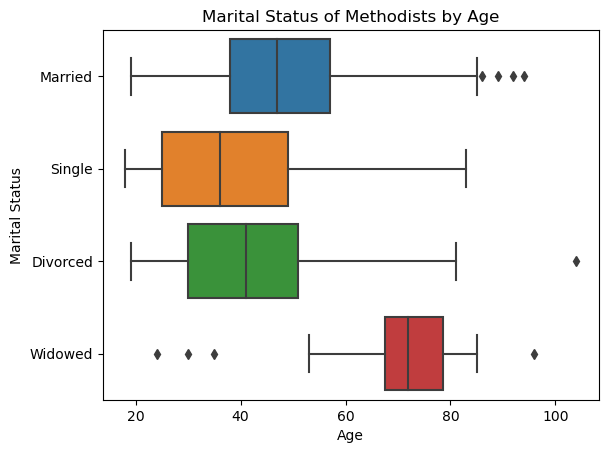

In [105]:
sns.boxplot(data =methodists , x = 'Age', y = 'Marital Status' ).set(title = 'Marital Status of Methodists by Age')

#### Bibliography

Data to fish (2021) Convert a List to Pandas Dataframe (with examples). Available at: https://datatofish.com/list-to-dataframe/ [Accessed on 04/04/2023].  

Diaz, A (2017) IN A PRISON FAR, FAR AWAY ‘Sith Lord’ lag whinges he cannot practice Star Wars religion inside as he is banned from wearing a hoodie. Available online:  https://www.thesun.co.uk/news/2511556/ [Accessed on 30/03/2023].  

Pandas(2023) User Guide. Pandas. Available online: https://pandas.pydata.org/docs/user_guide/index.html. [Accessed on 20/03/2023]

Wascom, M. (2022) API reference#, API reference - seaborn 0.12.2 documentation. Available at: https://seaborn.pydata.org/api.html [Accessed on 20/03/2023]. 

The above references were used as guidelines for the codes generated. Also, I used the shortcut: Pressing Shift + Tab in most cases to undertand the syntax of the functions